**Analysis3**

In [51]:
# imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');

In [52]:
df = pd.read_csv("CARSSSS.csv")
# to display the top 5 rows
df.head(5)

,Make,Model,Variant,Price,Displacement,Cylinders,Drivetrain,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Doors,City_Mileage,ARAI_Certified_Mileage,Power,Torque,Type,Wheelbase
0,Tata,Nano Genx,Xt,"292,667",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,23.6,38.0,51.0,Manual,2230.0
1,Tata,Nano Genx,Xe,"236,447",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,23.6,38.0,51.0,Manual,2230.0
2,Tata,Nano Genx,Emax Xm,"296,661",624.0,2.0,RWD (Rear Wheel Drive),Injection,15.0,CNG,1652.0,3164.0,1750.0,4.0,NaN,NaN,38.0,51.0,Manual,2230.0
3,Tata,Nano Genx,Xta,"334,768",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,21.9,38.0,51.0,Automatic,2230.0
4,Tata,Nano Genx,Xm,"272,223",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,23.6,38.0,51.0,Manual,2230.0


In [57]:
df.tail(5)

,Make,Model,Variant,Price,Displacement,Cylinders,Drivetrain,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Doors,City_Mileage,ARAI_Certified_Mileage,Power,Torque,Type,Wheelbase
1271,Honda,City,Vx Mt Diesel,"1,302,000",1498.0,4.0,FWD (Front Wheel Drive),Injection,40.0,Diesel,1495.0,4440.0,1695.0,4.0,22.6,25.10,100.0,200.0,Manual,2600.0
1272,Honda,City,Zx Mt Diesel,"1,421,000",1498.0,4.0,FWD (Front Wheel Drive),Injection,40.0,Diesel,1495.0,4440.0,1695.0,4.0,22.6,25.10,100.0,200.0,Manual,2600.0
1273,Honda,City,Zx Cvt Petrol,"1,431,000",1497.0,4.0,FWD (Front Wheel Drive),Injection,40.0,Petrol,1495.0,4440.0,1695.0,4.0,18,22.60,119.0,145.0,Automatic,2600.0
1274,Honda,City,V Cvt Petrol,"1,201,000",1497.0,4.0,FWD (Front Wheel Drive),Injection,40.0,Petrol,1495.0,4440.0,1695.0,4.0,14.3,17.80,119.0,145.0,Automatic,2600.0
1275,Mitsubishi,Montero,3.2 At,"6,862,560",3200.0,4.0,AWD (All Wheel Drive),Injection,88.0,Diesel,1900.0,4900.0,1875.0,5.0,8.25,11.56,202.0,441.0,Automatic,2780.0


Checking the type of data

In [58]:
df.dtypes

Make                       object
Model                      object
Variant                    object
Price                      object
Displacement              float64
Cylinders                 float64
Drivetrain                 object
Fuel_System                object
Fuel_Tank_Capacity        float64
Fuel_Type                  object
Height                    float64
Length                    float64
Width                     float64
Doors                     float64
City_Mileage               object
ARAI_Certified_Mileage    float64
Power                     float64
Torque                    float64
Type                       object
Wheelbase                 float64
dtype: object

Dropping the duplicate rows

In [59]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (9, 20)


Now lets remove the duplicate data because its ok to remove them

In [60]:
df.count()   #used to count the number of rows

Make                      1201
Model                     1276
Variant                   1276
Price                     1276
Displacement              1264
Cylinders                 1210
Drivetrain                1269
Fuel_System               1268
Fuel_Tank_Capacity        1207
Fuel_Type                 1276
Height                    1275
Length                    1276
Width                     1264
Doors                     1272
City_Mileage               721
ARAI_Certified_Mileage    1162
Power                     1276
Torque                    1274
Type                      1275
Wheelbase                 1256
dtype: int64

In [61]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Variant,Price,Displacement,Cylinders,Drivetrain,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Doors,City_Mileage,ARAI_Certified_Mileage,Power,Torque,Type,Wheelbase
0,Tata,Nano Genx,Xt,"292,667",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,23.6,38.0,51.0,Manual,2230.0
1,Tata,Nano Genx,Xe,"236,447",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,23.6,38.0,51.0,Manual,2230.0
2,Tata,Nano Genx,Emax Xm,"296,661",624.0,2.0,RWD (Rear Wheel Drive),Injection,15.0,CNG,1652.0,3164.0,1750.0,4.0,NaN,NaN,38.0,51.0,Manual,2230.0
3,Tata,Nano Genx,Xta,"334,768",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,21.9,38.0,51.0,Automatic,2230.0
4,Tata,Nano Genx,Xm,"272,223",624.0,2.0,RWD (Rear Wheel Drive),Injection,24.0,Petrol,1652.0,3164.0,1750.0,5.0,23.6,23.6,38.0,51.0,Manual,2230.0


In [62]:
df.count()

Make                      1192
Model                     1267
Variant                   1267
Price                     1267
Displacement              1255
Cylinders                 1201
Drivetrain                1260
Fuel_System               1259
Fuel_Tank_Capacity        1198
Fuel_Type                 1267
Height                    1266
Length                    1267
Width                     1255
Doors                     1263
City_Mileage               713
ARAI_Certified_Mileage    1153
Power                     1267
Torque                    1265
Type                      1266
Wheelbase                 1247
dtype: int64

In [63]:
print(df.isnull().sum())

Make                       75
Model                       0
Variant                     0
Price                       0
Displacement               12
Cylinders                  66
Drivetrain                  7
Fuel_System                 8
Fuel_Tank_Capacity         69
Fuel_Type                   0
Height                      1
Length                      0
Width                      12
Doors                       4
City_Mileage              554
ARAI_Certified_Mileage    114
Power                       0
Torque                      2
Type                        1
Wheelbase                  20
dtype: int64


In [64]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make                      608
Model                     608
Variant                   608
Price                     608
Displacement              608
Cylinders                 608
Drivetrain                608
Fuel_System               608
Fuel_Tank_Capacity        608
Fuel_Type                 608
Height                    608
Length                    608
Width                     608
Doors                     608
City_Mileage              608
ARAI_Certified_Mileage    608
Power                     608
Torque                    608
Type                      608
Wheelbase                 608
dtype: int64

In [65]:
print(df.isnull().sum())   # After dropping the values

Make                      0
Model                     0
Variant                   0
Price                     0
Displacement              0
Cylinders                 0
Drivetrain                0
Fuel_System               0
Fuel_Tank_Capacity        0
Fuel_Type                 0
Height                    0
Length                    0
Width                     0
Doors                     0
City_Mileage              0
ARAI_Certified_Mileage    0
Power                     0
Torque                    0
Type                      0
Wheelbase                 0
dtype: int64


Now we check the relation power and price considering different body type

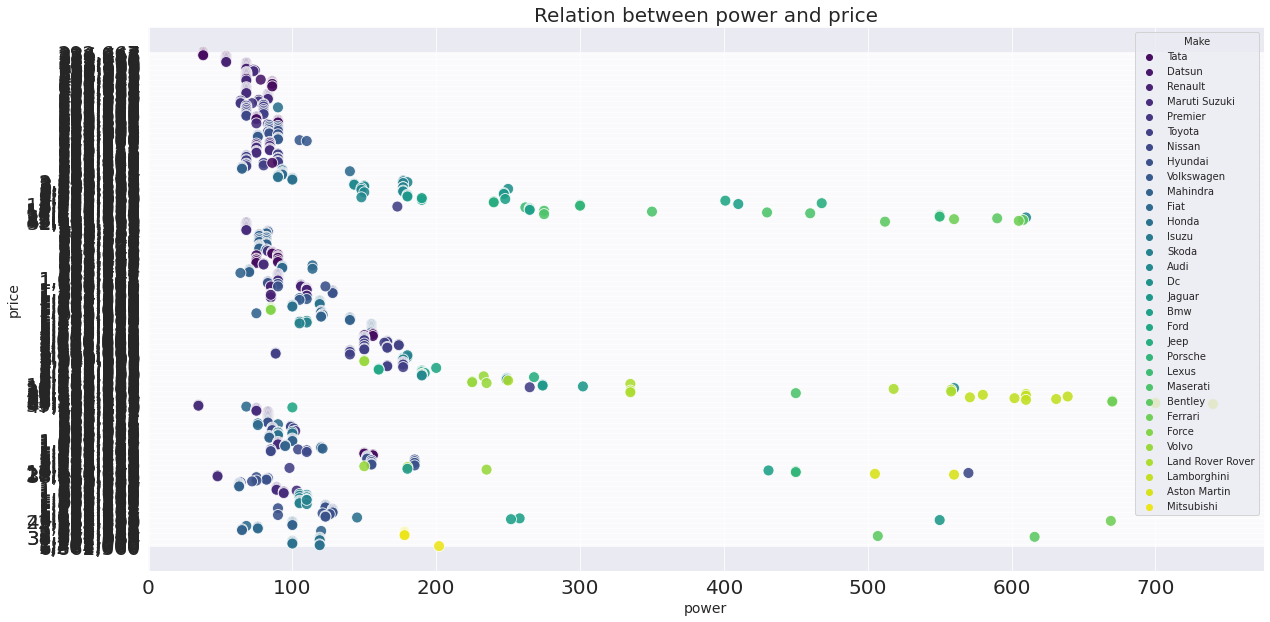

In [66]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x='Power', y='Price',hue='Make',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=20);
plt.yticks(fontsize=20)
plt.xlabel('power',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.title('Relation between power and price',fontsize=20);

Heat Maps

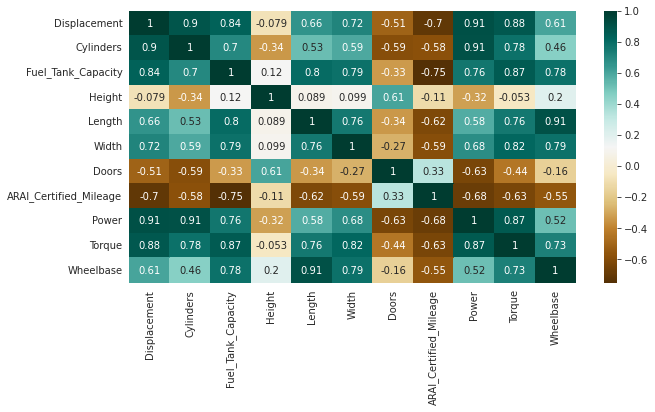

In [67]:
# Plotting a heat map
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

Heat Maps is a plot which is necessary when we need to find the dependent variables. One of the best ways to find the correlation between the features can be done using heat maps. As shown below the price feature (Price) has a strong correlation with power t,his is very important because the more the relationship between the variables the more accurate the model will be. This is how the correlation between the features can be found using heat maps. With the help of heat maps I can use these related features in building my model.

We can also look into the relation between Mileage and price

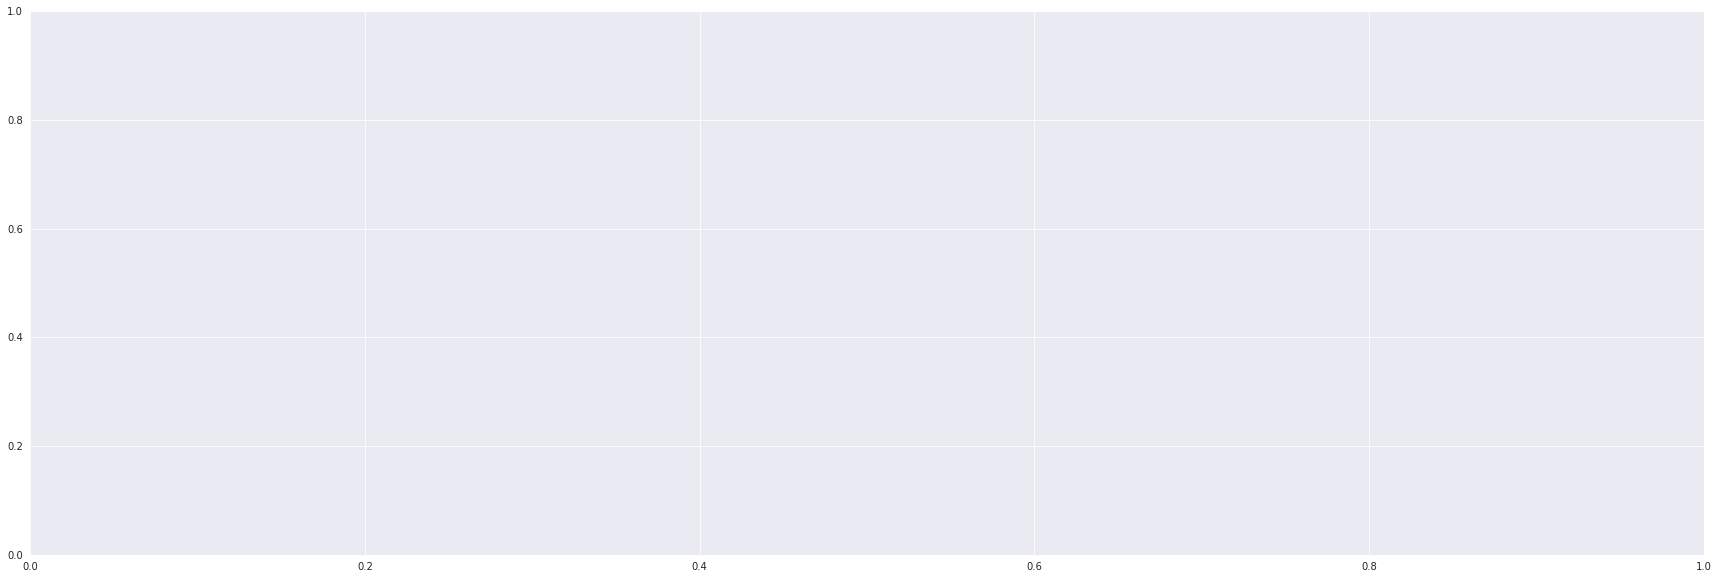

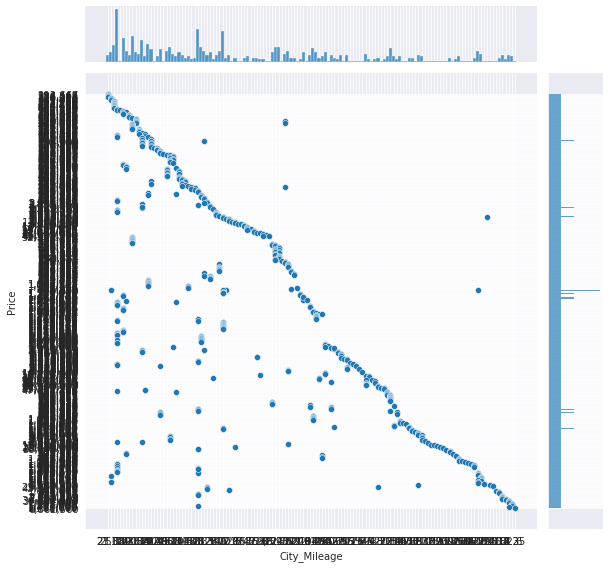

In [68]:
fig = plt.figure(figsize= (30,10))

ax= fig.add_subplot()
sns.jointplot(data=df, x='City_Mileage', y='Price',ax=ax, palette='viridis',height=8,  ratio=7)


It's looks like expensive cars tend to have worse mileage

Now we check an extensive scatter plot grid of more numerical variable to investigate the realtion in more detail

In [69]:
fig = px.scatter_3d(df, x='Power', z='Price', y='Variant',color='Make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();